# Spotify Top 50 Tracks 2020 – Data Analysis Project

**Summary:**

In this project, we analyzed Spotify’s Top 50 tracks from 2020 to uncover patterns in musical features, artist presence, genre diversity, and factors that may contribute to a song’s popularity. The analysis focused on key audio characteristics such as danceability, loudness, and acousticness — and how these varied across genres and artists.

**Familiar Artists, But Room for Diversity**

- 7 artists had more than one track on the list; Dua Lipa, Billie Eilish, and Travis Scott each appeared three times.

- However, there were 40 unique artists and 45 unique albums, showing strong artist variety.

- Pop is the most dominant genre (14 songs), but 16 total genres were represented, and 10 genres appeared only once.

While major artists dominate, the charts still reward diversity and innovation — allowing for both global stars and breakthrough tracks from niche styles.

**Features of Hit song**:

- Danceability: 64% of the songs have a danceability score above 0.7, indicating a strong rhythmic component that makes them suitable for dancing or movement.

- Energy and loudness are strongly correlated: louder songs tend to feel more energetic.

- However, Pop — the most popular genre — is not the loudest, showing that emotional tone, melody, and structure can matter more than volume alone.

- Tracks mostly range from 2.5 to 4 minutes, ideal for streaming and repeated listening.

- Among the Top 4 genres — Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie — acousticness was generally low, especially in Hip-Hop/Rap and Dance/Electronic, reflecting a preference for synthetic sounds.

# Data load

Data is dowloaded from: [Spotify Top 50 Tracks of 2020 dataset](https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020).

Dataset loaded directly from GitHub to ensure reproducibility. This eliminates the need for manual uploads and makes sharing seamless.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://raw.githubusercontent.com/RutaGedvi/temp/main/spotifytoptracks.csv'
df = pd.read_csv(url, index_col=0)

df.head(3)


,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap


# Data Overview

In [ ]:
print(
    f"There are {df.shape[0]} observations and {df.shape[1]} "
    "features in this dataset."
)

There are 50 observations and 16 features in this dataset.


In [ ]:
categorical_features = df.select_dtypes(
    include=['object', 'category']
).columns.tolist()
print("Categorical features:", categorical_features)

numeric_features = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric features:", numeric_features)

Categorical features: ['artist', 'album', 'track_name', 'track_id', 'genre']
Numeric features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


# Data Cleaning

In this section, I will clean the Spotify Top 50 dataset to ensure the analysis is accurate and reliable. I’ll address three key areas:

*   Missing values
*   Duplicates
*   Outliers

#### Missing data

No missing values were identified in the dataset based on the results of the `isnull().sum()` method. Therefore, no imputation or removal of data was necessary at this stage.


In [ ]:
df.isnull().sum()

,0
artist,0
album,0
track_name,0
track_id,0
energy,0
danceability,0
key,0
loudness,0
acousticness,0
speechiness,0


#### Duplicate Check

No duplicate records were found in the dataset based on a row-wise comparison using the `duplicated()` method. As a result, no further action was required for duplicate removal.


In [ ]:
df.duplicated(subset=df.columns).sum()

np.int64(0)

#### Outlier Detection Based on Summary Statistics

I reviewed the summary statistics of all numeric features using the `describe()` method and z-scores. While some values, such as in `speechiness`, `instrumentalness`, `duration_ms` and `liveness`, appear distant from the typical range, they likely reflect the diversity of musical styles rather than data errors.

Based on this, I decided **not to remove any outliers** and to retain all data for analysis.



In [ ]:
df.describe(include="number")

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


In [ ]:
desc = df.describe(include="number")

z_scores = (desc.loc["max"] - desc.loc["mean"]) / desc.loc["std"]

outliers = z_scores[z_scores > 3]

print("Potential outliers (max > 3 std deviations):\n", outliers)

Potential outliers (max > 3 std deviations):
 speechiness         3.105557
instrumentalness    6.797019
liveness            3.371543
duration_ms         3.319927
dtype: float64


# Exploratory Data Analysis

####**Artists**

##### **Artists with multiple track in the Top 50 list**
**Objective**

We want to understand which artists are most represented in Spotify’s Top 50 tracks of 2020.

**Method**

We group the dataset by the artist column and count the number of tracks in each category. This tells us how frequently each artist appears.

**Result**

I found that seven artists have more than one track in the Top 50 list.
This suggests that a small number of artists had multiple high-performing songs in 2020.

**Interpretation**

This indicates that a small group of artists dominated the charts in 2020, consistently releasing multiple successful tracks. It suggests strong brand recognition, fan loyalty, and possibly effective promotional strategies. These artists may have had a greater influence on mainstream music trends during that year.


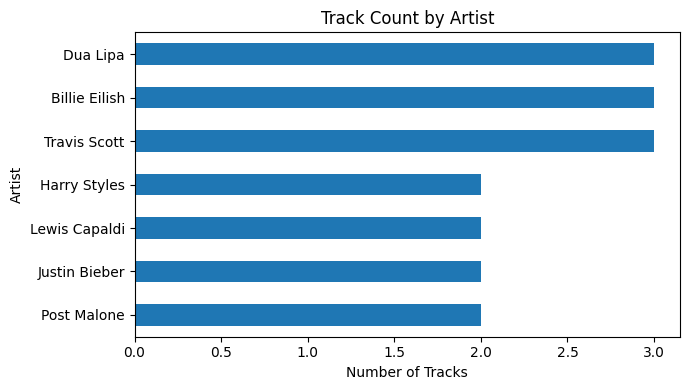

In [ ]:
artist_counts = df['artist'].value_counts().reset_index()
artist_counts.columns = ['artist', 'track_count']

multiple_tracks = artist_counts[artist_counts['track_count'] > 1]

# Plot
multiple_tracks.set_index('artist')['track_count'].plot(
    kind='barh',
    figsize=(7, 4),
    title='Track Count by Artist'
)

plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### **Most popular artist**

**Objective**

Identify the most frequently featured artists in Spotify's Top 50 tracks of 2020.

**Method**

Count the number of times each artist appears in the dataset, and filter for those with the highest track count.

**Result**

Several artists appeared three times in the Top 50 list, including Travis Scott, Billie Eilish, and Dua Lipa, making them the most represented artists in the dataset.

**Interpretation**

These artists maintained strong, consistent popularity throughout the year, each releasing multiple high-performing tracks. This suggests a high level of audience engagement and promotional success, as well as their influence on the mainstream music landscape in 2020.

In [ ]:
artist_counts = df['artist'].value_counts()

max_count = artist_counts.max()

top_artists = artist_counts[artist_counts == max_count]

print(top_artists)

artist
Dua Lipa         3
Billie Eilish    3
Travis Scott     3
Name: count, dtype: int64


##### **Number of unique artists**

**Objective**

Determine how many unique artists are represented in Spotify’s Top 50 tracks of 2020.

**Method**

Use the .nunique() function to count the number of distinct names in the artist column.

**Result**

There are 40 unique artists represented in the Top 50 list. While a few artists appear multiple times, most are featured only once.

**Interpretation**

This suggests that the Top 50 tracks include a diverse mix of artists, rather than being heavily dominated by a small group. While major stars released multiple hits, the presence of many one-track artists reflects the openness of the charts to new or emerging talent.

In [ ]:
unique_artist_count = df['artist'].nunique()
print(f"There are {unique_artist_count} unique artists in the Top 50.")

There are 40 unique artists in the Top 50.


#### **Albums**


##### **Unique albums**

**Objective**

Determine how many unique albums are represented in Spotify’s Top 50 tracks of 2020.

**Method**

Use the .nunique() function to count the number of distinct albums in the album column.

**Result**

There are 45 unique albums represented in the Top 50 list.

**Interpretation**

This shows that most tracks in the Top 50 come from different albums, with only a few albums contributing multiple songs. It suggests a broad spread of successful releases rather than heavy concentration from a few blockbuster albums.

In [ ]:
unique_album_count = df['album'].nunique()
print(f"There are {unique_album_count} unique albums in the Top 50.")

There are 45 unique albums in the Top 50.


##### **Albums with multiple tracks in top 50 list**

**Objective**

Identify albums that contributed more than one track to the Top 50 list and determine which album had the most tracks.

**Method**

Group the dataset by album and count how many tracks each album contains. Filter for albums with more than one entry.

**Result**

Four albums appear more than once in the Top 50. Notably, Dua Lipa’s Future Nostalgia has the highest presence, contributing three tracks to the list.

**Interpretation**

While most albums in the Top 50 only contributed a single track, a few standout albums achieved multiple charting songs, indicating strong overall reception and consistency in quality. Dua Lipa’s Future Nostalgia, in particular, reflects high popularity and effective album promotion throughout the year.

In [ ]:
album_artist_counts = (
    df.groupby(['album', 'artist'])
    .size()
    .reset_index(name='track_count')
)

multiple_album_tracks = album_artist_counts[
    album_artist_counts['track_count'] > 1
]

multiple_album_tracks = multiple_album_tracks.sort_values(
    by='track_count', ascending=False
)

print(multiple_album_tracks)

                   album         artist  track_count
14      Future Nostalgia       Dua Lipa            3
6                Changes  Justin Bieber            2
13             Fine Line   Harry Styles            2
19  Hollywood's Bleeding    Post Malone            2


#### **Track-level features (length, loudness, danceability)**



##### **Danceability**


**Objective**

Identify tracks with notably high or low danceability scores to understand how rhythm and movement relate to popular songs.

**Method**

Filter the dataset for tracks with a danceability score above 0.7 (high) and below 0.4 (low). Count the number of songs in each category.

**Result**

32 songs in the Top 50 have a danceability score above 0.7, indicating strong rhythmic quality.

Only one song has a score below 0.4 — lovely (with Khalid) by Billie Eilish.

**Interpretation**

This suggests that high danceability is a common feature among top-performing tracks in 2020, supporting the idea that rhythm and groove are key drivers of popularity. The rarity of low-danceability songs implies that slower or less rhythmic tracks are less likely to reach mainstream chart success.

In [ ]:
high_danceability = df[df['danceability'] > 0.7]

print(
    f"There are {high_danceability.shape[0]} songs with a "
    "danceability score above 0.7."
)

high_danceability[['track_name', 'artist', 'danceability']]


There are 32 songs with a danceability score above 0.7.


,track_name,artist,danceability
1,Dance Monkey,Tones And I,0.825
2,The Box,Roddy Ricch,0.896
3,Roses - Imanbek Remix,SAINt JHN,0.785
4,Don't Start Now,Dua Lipa,0.793
5,ROCKSTAR (feat. Roddy Ricch),DaBaby,0.746
7,death bed (coffee for your head),Powfu,0.726
8,Falling,Trevor Daniel,0.784
10,Tusa,KAROL G,0.803
13,Blueberry Faygo,Lil Mosey,0.774
14,Intentions (feat. Quavo),Justin Bieber,0.806


In [ ]:
low_danceability = df[df['danceability'] < 0.4]

print(
    f"There are {low_danceability.shape[0]} songs with a "
    "danceability score below 0.4."
)

low_danceability[['track_name', 'artist', 'danceability']]

There are 1 songs with a danceability score below 0.4.


,track_name,artist,danceability
44,lovely (with Khalid),Billie Eilish,0.351


##### **Loudness**

**Objective**

Analyze loudness levels among the Top 50 tracks to see whether louder or softer songs were more likely to chart.

**Method**

Filter the dataset for tracks with loudness above −5 dB (relatively loud) and below −8 dB (relatively soft). Count how many songs fall into each category.

**Result**

19 tracks have loudness above −5 dB, indicating higher volume and possibly greater energy.

9 tracks have loudness below −8 dB, while the majority fall in the middle range.

**Interpretation**

This distribution shows that while louder songs are common among popular tracks, they are not a strict requirement for chart success. The presence of softer tracks suggests that other qualities — such as melody, emotion, or lyrical content — can also drive a song’s popularity, not just high mastering volume.

In [ ]:
high_loudness = df[df['loudness'] > -5]

print(
    f"There are {high_loudness.shape[0]} songs with a "
    "loudness level above -5 dB."
)

high_loudness[['track_name', 'artist', 'loudness']]

There are 19 songs with a loudness level above -5 dB.


,track_name,artist,loudness
4,Don't Start Now,Dua Lipa,-4.521
6,Watermelon Sugar,Harry Styles,-4.209
10,Tusa,KAROL G,-3.280
12,Circles,Post Malone,-3.497
16,Before You Go,Lewis Capaldi,-4.858
17,Say So,Doja Cat,-4.577
21,Adore You,Harry Styles,-3.675
23,Mood (feat. iann dior),24kGoldn,-3.558
31,Break My Heart,Dua Lipa,-3.434
32,Dynamite,BTS,-4.410


In [ ]:
low_loudness = df[df['loudness'] < -8]

print(
    f"There are {low_loudness.shape[0]} songs with a "
    "loudness level below -8 dB."
)

low_loudness[['track_name', 'artist', 'loudness']]

There are 9 songs with a loudness level below -8 dB.


,track_name,artist,loudness
7,death bed (coffee for your head),Powfu,-8.765
8,Falling,Trevor Daniel,-8.756
15,Toosie Slide,Drake,-8.820
20,Savage Love (Laxed - Siren Beat),Jawsh 685,-8.520
24,everything i wanted,Billie Eilish,-14.454
26,bad guy,Billie Eilish,-10.965
36,HIGHEST IN THE ROOM,Travis Scott,-8.764
44,lovely (with Khalid),Billie Eilish,-10.109
47,If the World Was Ending - feat. Julia Michaels,JP Saxe,-10.086


##### **Track length**

**Objective**

Identify the longest and shortest tracks in the Top 50 dataset to understand variation in song length.

**Method**

Convert the duration_ms field to minutes (duration_min) and find the maximum and minimum values to locate the longest and shortest tracks.

**Result**

The longest track runs for 5.21 minutes (SICKO MODE by Travis Scott).

The shortest track is 2.34 minutes long (Mood (feat. iann dior) by 24kGoldn).

**Interpretation**

These duration outliers may reflect differences in genre, song structure, or artistic intent. Longer tracks might include extended intros/outros or storytelling elements, while shorter songs could be designed for quick radio or streaming appeal. Overall, most songs in the dataset fall within a narrow range, but these extremes highlight creative variation.

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

longest_track = df[df['duration_min'] == df['duration_min'].max()]

print("Longest Track:")
longest_track[['track_name', 'artist', 'duration_min']]

Longest Track:


,track_name,artist,duration_min
49,SICKO MODE,Travis Scott,5.213667


In [ ]:
shortest_track = df[df['duration_min'] == df['duration_min'].min()]

print("Shortest Track:")
shortest_track[['track_name', 'artist', 'duration_min']]

Shortest Track:


,track_name,artist,duration_min
23,Mood (feat. iann dior),24kGoldn,2.3421


## Genre comparisons

##### **Genre Distribution**

**Objective**

Determine how many different musical genres are represented in the Top 50 tracks of 2020.

**Method**

Use the .nunique() function or group by genre and count the number of unique genre entries in the dataset.

**Result**

The dataset includes 16 distinct genres, indicating a wide variety of musical styles.

**Interpretation**

This highlights the diversity of the 2020 Top 50, with artists from a range of genres finding mainstream success. While some genres are more dominant than others, the presence of 16 genres suggests that the charts were not limited to a single style or sound.


In [ ]:
genre_counts = df.groupby('genre').size().reset_index(name='track_count')

print(f"There are {genre_counts.shape[0]} different genres in the list.")

There are 16 different genres in the list.


##### **Most represented genre**

**Objective**

Identify the most common genre among the Top 50 tracks of 2020.

**Method**

From grouped by genre dataset count the number of tracks in each category, and sort to find the most represented genre.

**Result**

The most represented genre is Pop, which accounts for 14 tracks — nearly one-third of the dataset.

**Interpretation**

This indicates that Pop music played a dominant role in shaping mainstream popularity in 2020. Its strong presence reflects widespread audience appeal and continued industry focus on pop-oriented production and promotion.


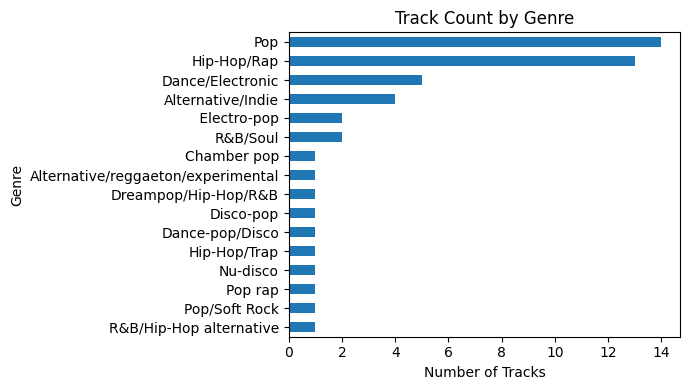

In [ ]:
genre_counts = genre_counts.sort_values(by='track_count', ascending=False)

genre_counts.set_index('genre')['track_count'].plot(
    kind='barh',
    figsize=(7, 4),
    title='Track Count by Genre'
)

plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### **Least Represented Genres**

**Objective**

Identify how many genres are minimally represented in the Top 50 — specifically, those with only one track.

**Method**

From grouped by genre dataset count the number of tracks per genre. Filter for genres with a track count of exactly one.

**Result**

There are 10 genres in the dataset that are represented by only one track each.

**Interpretation**

While dominant genres like Pop appear frequently, the presence of these singly represented genres suggests that the Top 50 also includes space for diversity and experimentation. Tracks from niche or genre-blending categories can still break into mainstream charts, reflecting a broader musical landscape.

In [ ]:
genre_counts[genre_counts['track_count']==1]

,genre,track_count
3,Chamber pop,1
2,Alternative/reggaeton/experimental,1
7,Dreampop/Hip-Hop/R&B,1
6,Disco-pop,1
4,Dance-pop/Disco,1
9,Hip-Hop/Trap,1
10,Nu-disco,1
12,Pop rap,1
13,Pop/Soft Rock,1
14,R&B/Hip-Hop alternative,1


## Features comparison



#### **Features correlation**

**Objective**

Explore how audio features are related by identifying positive, negative, and weak correlations among numeric variables.

**Method**

Generate a correlation matrix using the .corr() method on numeric features, then visualize it with a heatmap. Identify strong positive or negative relationships based on the correlation coefficients.

**Result**

Positive correlations:

- Energy and loudness are strongly correlated — louder songs are generally more energetic.

- Danceability and valence show a positive relationship — upbeat songs tend to be more danceable.

Negative correlations:

- Acousticness and loudness are negatively correlated — more acoustic songs are typically quieter.

- Instrumentalness and loudness show a moderate negative correlation — louder songs are often less instrumental.

Weak or no correlation:

- Key, tempo, and duration show little to no strong correlation with other features.

**Interpretation**

The correlation heatmap helps reveal which audio features tend to vary together. Strong positive and negative correlations offer insights into how production traits (like loudness or acousticness) interact. Weak correlations suggest that some features, like tempo or key, may not strongly influence overall song character in this dataset.

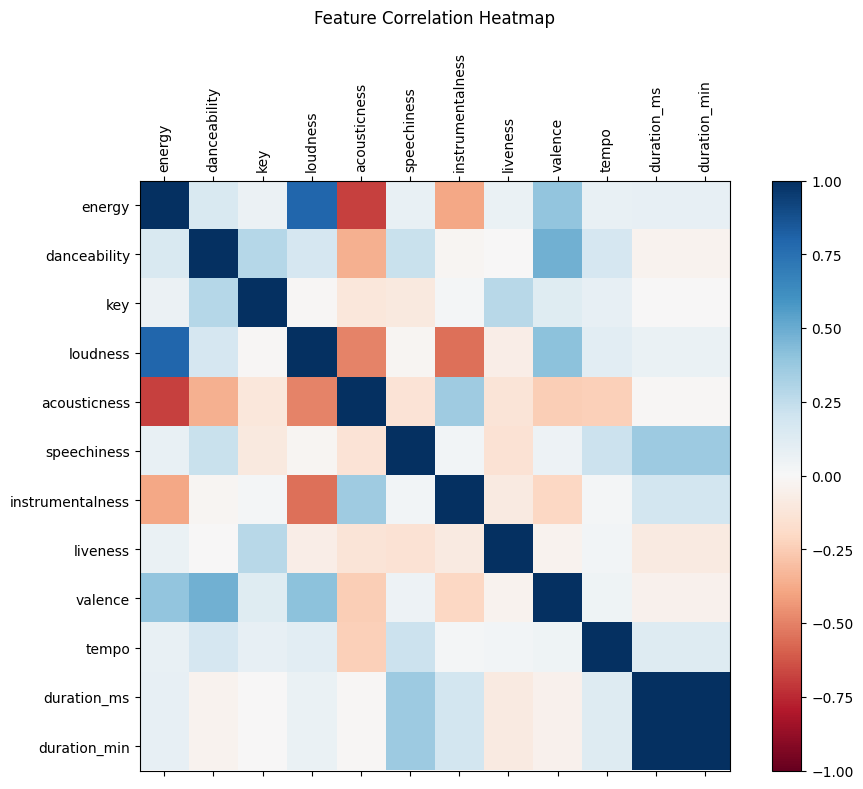

In [ ]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1)

fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

plt.title('Feature Correlation Heatmap', pad=20)
plt.tight_layout()
plt.show()

#### Feaures comparison between TOP 4 genres

##### **Danceability by Genre**

**Objective**

Compare average danceability scores across selected genres to understand how genre influences a track’s rhythmic appeal.

**Method**

Filter the dataset for four selected genres: Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie. Group the data by genre and calculate the average danceability score for each.

**Result**

Dance/Electronic and Hip-Hop/Rap have the highest average danceability scores, reflecting their rhythmic, beat-driven nature.

Alternative/Indie has the lowest average danceability, consistent with its more laid-back and experimental style.

**Interpretation**

This analysis suggests that genre strongly influences danceability. Genres designed for movement and rhythm score higher, while more introspective or acoustic-leaning genres tend to be less danceable. These patterns align with listener expectations and genre characteristics.


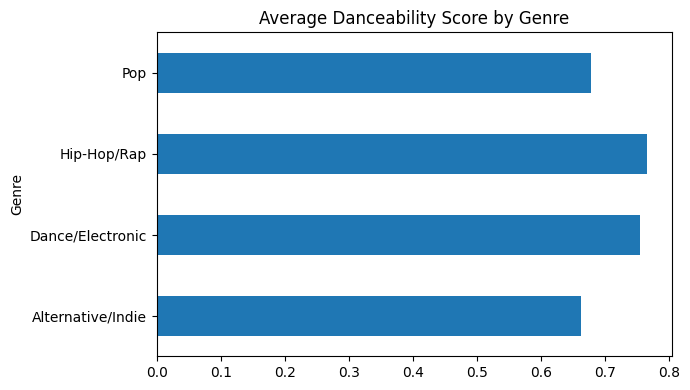

In [ ]:
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

filtered_df = df[df['genre'].isin(selected_genres)][
    ['genre', 'danceability', 'loudness', 'acousticness']
]

avg_scores = (
    filtered_df
    .groupby('genre')[['danceability', 'loudness', 'acousticness']]
    .mean()
    .reset_index()
    .rename(columns={
        'danceability': 'avg_danceability',
        'loudness': 'avg_loudness',
        'acousticness': 'avg_acoustics'
    })
)

avg_scores.set_index('genre')['avg_danceability'].plot(
    kind='barh',
    figsize=(7, 4),
    title='Average Danceability Score by Genre'
)

plt.ylabel('Genre')
plt.tight_layout()
plt.show()

##### **Loudness between genres**

**Objective**

Compare the average loudness levels across selected genres to understand how volume varies by musical style.

**Method**

Filter the dataset for Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie, then calculate the average loudness (in dB) for each genre.

**Result**

Contrary to expectation, Dance/Electronic and Alternative/Indie are the loudest genres in this dataset, with average loudness levels around −5 dB.

Pop and Hip-Hop/Rap are slightly quieter on average, with loudness closer to −6 to −7 dB.

**Interpretation**

While Pop and Hip-Hop are often associated with loud, high-energy production, the Top 50 dataset from 2020 shows that Dance/Electronic and Alternative/Indie tracks were mastered louder overall. This could reflect production choices emphasizing clarity, punch, or intensity in these genres. It also reminds us that loudness alone doesn’t define energy — factors like rhythm, tempo, and arrangement play key roles too.

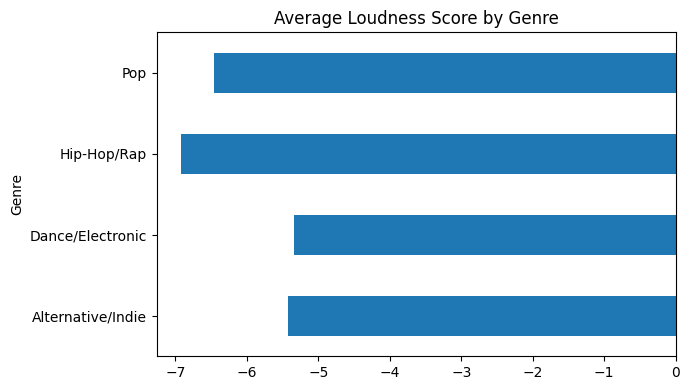

In [ ]:
avg_scores.set_index('genre')['avg_loudness'].plot(
    kind='barh',
    figsize=(7, 4),
    title='Average Loudness Score by Genre'
)

plt.ylabel('Genre')
plt.tight_layout()
plt.show()

##### **Acoustics between genres**

**Objective**

Analyze how acousticness varies across selected genres to understand the role of organic vs. synthetic sound in popular music.

**Method**

Filter the dataset for Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie. Group by genre and calculate the average acousticness score for each.

**Result**

Alternative/Indie has the highest acousticness, indicating a stronger presence of organic or acoustic instrumentation.

Dance/Electronic and Hip-Hop/Rap have the lowest acousticness, reflecting heavier use of electronic production.

Pop falls in the middle, balancing both acoustic and synthetic elements.

**Interpretation**

These findings align with genre expectations — Alternative/Indie often prioritizes live instruments, while Dance and Hip-Hop are more digitally produced. Pop’s position in between suggests it draws from both styles, contributing to its widespread appeal and adaptability across audiences.

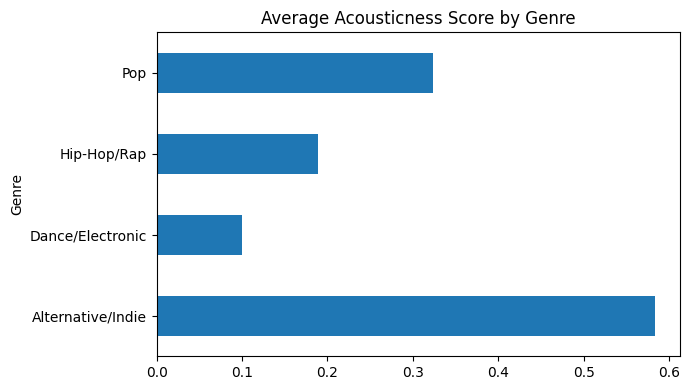

In [ ]:
avg_scores.set_index('genre')['avg_acoustics'].plot(
    kind='barh',
    figsize=(7, 4),
    title='Average Acousticness Score by Genre'
)

plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#  Suggestions for Improvement

To deepen this analysis and generate more meaningful insights, the following improvements are recommended:

**Include historical data across multiple years** (e.g., 2018–2023) to uncover trends over time, such as shifts in genre popularity, changes in track duration, or evolving preferences in danceability and energy.

**Expand beyond the Top 50 by analyzing a larger sample**(e.g., Top 200 or all tracks from global charts). This would reduce sampling bias and reveal broader patterns.

**Incorporate listener demographics** (if available), such as country, age, or gender, to explore how different audiences engage with various genres or audio features.

These extensions would provide richer context and help identify both short-term hits and long-term trends in music consumption.